In [38]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

This EDA aims to answer the following questions:

What is the distribution of Movies vs TV Shows on Netflix?

How has the volume of content added to Netflix changed over time?

How do movie runtimes and TV show seasons vary?

What are the most common content genres on Netflix?

Which countries contribute the most content to the platform?


In [39]:
df = pd.read_csv('netflix_clean.csv')
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,added_year,added_month,added_day,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,90.0,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,2.0,season
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,1.0,season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24,1.0,season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24,2.0,season
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,24,1.0,season
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,24,91.0,min
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,24,125.0,min
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,24,9.0,season
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,24,104.0,min


In [40]:
#Shape
df.shape

(8797, 16)

In [41]:
#Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description', 'added_year',
       'added_month', 'added_day', 'duration_value', 'duration_unit'],
      dtype='object')

In [42]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8797 entries, 0 to 8796
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   show_id         8797 non-null   object 
 1   type            8797 non-null   object 
 2   title           8797 non-null   object 
 3   director        6173 non-null   object 
 4   cast            7972 non-null   object 
 5   country         7967 non-null   object 
 6   date_added      8797 non-null   object 
 7   release_year    8797 non-null   int64  
 8   rating          8790 non-null   object 
 9   listed_in       8797 non-null   object 
 10  description     8797 non-null   object 
 11  added_year      8797 non-null   int64  
 12  added_month     8797 non-null   int64  
 13  added_day       8797 non-null   int64  
 14  duration_value  8794 non-null   float64
 15  duration_unit   8794 non-null   object 
dtypes: float64(1), int64(4), object(11)
memory usage: 1.1+ MB


In [43]:
#Statistics of data
df.describe()

,release_year,added_year,added_month,added_day,duration_value
count,8797.000000,8797.000000,8797.000000,8797.000000,8794.000000
mean,2014.183472,2018.871888,6.654996,12.497329,69.920173
std,8.822191,1.574243,3.436554,9.887551,50.797005
min,1925.000000,2008.000000,1.000000,1.000000,1.000000
25%,2013.000000,2018.000000,4.000000,1.000000,2.000000
50%,2017.000000,2019.000000,7.000000,13.000000,88.000000
75%,2019.000000,2020.000000,10.000000,20.000000,106.000000
max,2021.000000,2021.000000,12.000000,31.000000,312.000000


In [44]:
#missing value summary
df.isna().mean().sort_values(ascending=False) * 100


director          29.828351
country            9.435035
cast               9.378197
rating             0.079573
duration_value     0.034103
duration_unit      0.034103
show_id            0.000000
type               0.000000
title              0.000000
date_added         0.000000
release_year       0.000000
listed_in          0.000000
description        0.000000
added_year         0.000000
added_month        0.000000
added_day          0.000000
dtype: float64

Purpose

Understand the composition of Netflix’s catalog by content type:

How many Movies vs TV Shows?

Is the platform movie-heavy or balanced?

In [45]:
df['type'].value_counts()

Movie      6131
TV Show    2666
Name: type, dtype: int64

In [46]:
df['type'].value_counts(normalize=True) * 100

Movie      69.694214
TV Show    30.305786
Name: type, dtype: float64

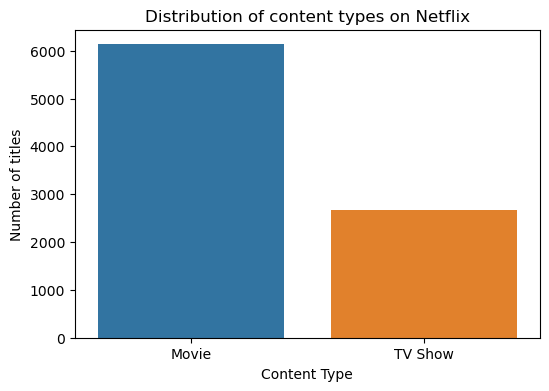

In [47]:
#plot
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='type')
plt.title("Distribution of content types on Netflix")
plt.xlabel('Content Type')
plt.ylabel('Number of titles')
plt.show()

In [48]:
df.groupby(["added_year", "type"]).size().unstack().tail()


type,Movie,TV Show
added_year,,
2017,839.0,349.0
2018,1237.0,412.0
2019,1424.0,592.0
2020,1284.0,595.0
2021,993.0,505.0


Purpose

Understand how Netflix’s catalog has grown over time:

Is content addition increasing?

Are there visible spikes or slowdowns?

Does this align with platform growth?



In [49]:
titles_per_year = df["added_year"].value_counts().sort_index()
titles_per_year


2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: added_year, dtype: int64

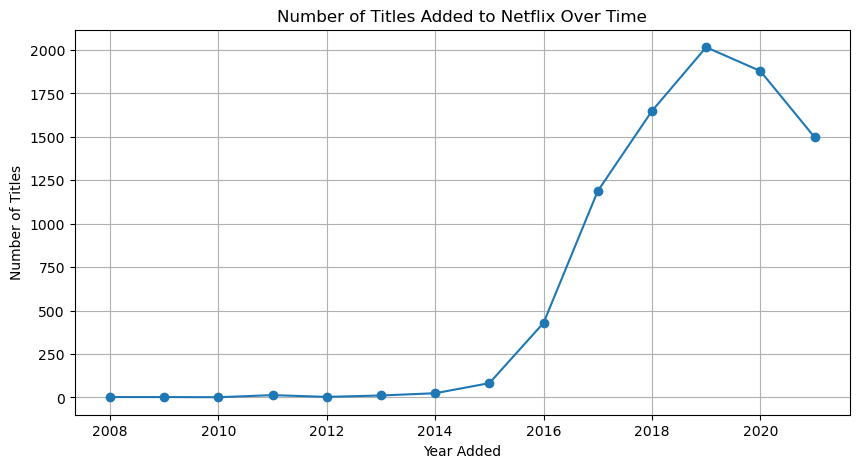

In [50]:
plt.figure(figsize=(10,5))
titles_per_year.plot(kind="line", marker="o")
plt.title("Number of Titles Added to Netflix Over Time")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


In [51]:
content_by_year_type = (
    df.groupby(["added_year", "type"])
      .size()
      .unstack(fill_value=0)
)
content_by_year_type.tail()


type,Movie,TV Show
added_year,,
2017,839,349
2018,1237,412
2019,1424,592
2020,1284,595
2021,993,505


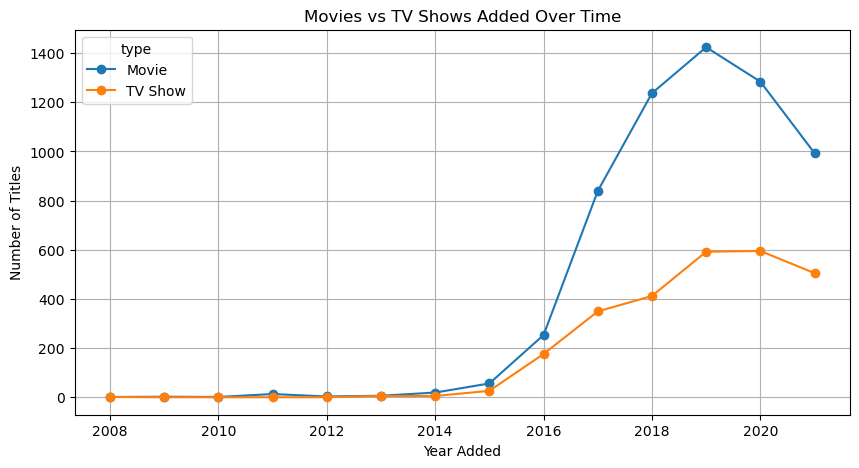

In [52]:
content_by_year_type.plot(
    kind="line",
    figsize=(10,5),
    marker='o'
)
plt.title("Movies vs TV Shows Added Over Time")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


While Movies consistently dominate the catalog, the number of TV Shows added has grown steadily in recent years, indicating diversification of content.

Purpose

Understand how long Netflix content is:

Movie runtimes (minutes)

TV show lengths (number of seasons)

In [53]:

movies = df[df["type"] == "Movie"]
tv_shows = df[df["type"] == "TV Show"]

In [54]:
movies["duration_value"].describe()


count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_value, dtype: float64

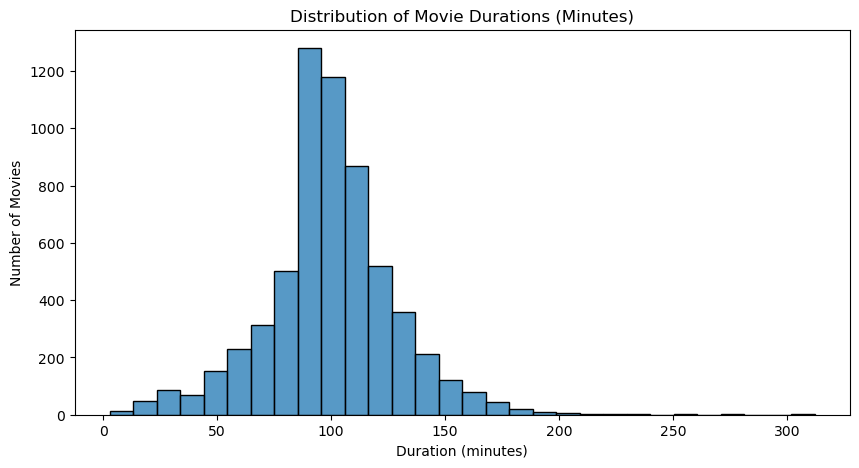

In [55]:
plt.figure(figsize=(10,5))
sns.histplot(movies["duration_value"], bins=30)
plt.title("Distribution of Movie Durations (Minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()


Purpose

Understand what kind of content Netflix focuses on:

Most common genres

Genre diversity

How content is categorized overall

In [58]:
genres=df['listed_in'].str.split(', ').explode()
genres.value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1350
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      574
Crime TV Shows                   469
Kids' TV                         449
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     175
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows                  151
C

In [60]:
genre_counts = genres.value_counts()
genre_counts.head(10)

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: listed_in, dtype: int64

Dramas and International content dominate Netflix’s catalog, followed by Comedies and Documentaries.

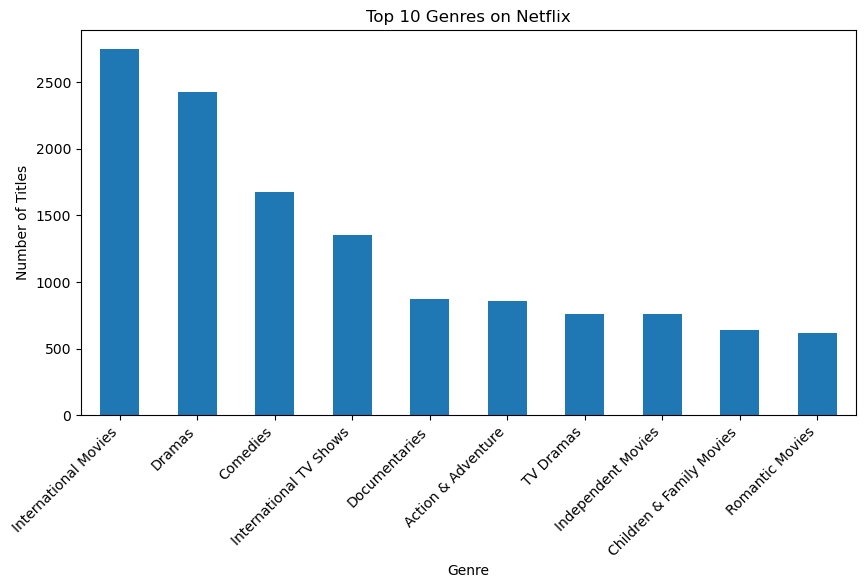

In [61]:
plt.figure(figsize=(10,5))
genre_counts.head(10).plot(kind="bar")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha="right")
plt.show()


Purpose

Understand where Netflix content comes from:

Which countries dominate the catalog?

How concentrated or diverse the content sources are?

In [62]:
countries = df["country"].dropna().str.split(", ").explode()


In [63]:
country_counts = countries.value_counts()
country_counts.head(10)


United States     3683
India             1046
United Kingdom     803
Canada             445
France             393
Japan              317
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: country, dtype: int64

The United States contributes the largest share of Netflix content, followed by India, the United Kingdom, and Canada.

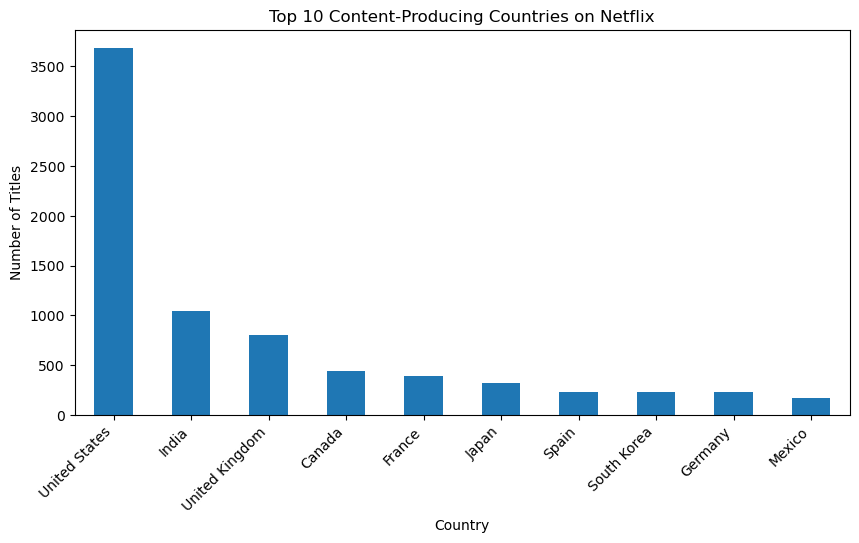

In [64]:
plt.figure(figsize=(10,5))
country_counts.head(10).plot(kind="bar")
plt.title("Top 10 Content-Producing Countries on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha="right")
plt.show()


This exploratory data analysis examined Netflix’s content catalog after a structured data cleaning process. The analysis showed that Movies dominate the platform, although TV Shows have grown steadily in recent years. Content additions increased significantly after 2015, reflecting Netflix’s rapid expansion phase.

Movie runtimes largely follow standard feature-length durations, while most TV shows consist of a small number of seasons, indicating a preference for shorter series formats. Genre analysis revealed a strong emphasis on Dramas, International content, and Comedies, suggesting a broad but drama-centric catalog.

Country-level analysis highlighted a high concentration of content from a small number of countries, particularly the United States, followed by India and the United Kingdom, while most titles are associated with a single country of production.

Overall, the EDA provides a clear overview of Netflix’s content composition, growth trends, and diversity, serving as a strong foundation for further analysis or modeling.